In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
from scipy import stats

In [2]:
geneNames = []
genes_to_plot_file = "dlpfc_snrna_seq_genes_to_plot.txt"
with open(genes_to_plot_file, 'r') as f:
    for line in f:
        geneName = line.strip()
        geneNames.append(geneName)

In [ ]:
oli_deg_no_vs_path_file = "/mathys_snrna_analysis/dlpfc_snrnaseq_oli_degs.txt"
oli_deg_no_vs_early_file = "/mathys_snrna_analysis/dlpfc_snrnaseq_oli_degs_no_vs_early.txt"

In [4]:
oli_deg_no_vs_path_data = pd.read_csv(oli_deg_no_vs_path_file, sep="\t", index_col=0)
oli_deg_no_vs_early_data = pd.read_csv(oli_deg_no_vs_early_file, sep="\t", index_col=0)

In [5]:
oligenel2FCs = []
oligeneIndModelFDRs = []
oligeneBaseMeans = []
oligeneConditionMeans = []
for geneName in geneNames:
    novsPathgeneData = oli_deg_no_vs_path_data.loc[geneName]
    novsEarlygeneData = oli_deg_no_vs_early_data.loc[geneName]
    
    
    
    oligenel2FCs.append(float(novsPathgeneData["IndModel.FC"]))
    oligenel2FCs.append(float(novsEarlygeneData["IndModel.FC"]))
    
    oligeneIndModelFDRs.append(-np.log10(float(novsPathgeneData["IndModel.adj.pvals"])))
    oligeneIndModelFDRs.append(-np.log10(float(novsEarlygeneData["IndModel.adj.pvals"])))
    
    oligeneBaseMeans.append(float(novsPathgeneData["no.pathology.mean"]))
    oligeneBaseMeans.append(float(novsEarlygeneData["early.pathology.mean"]))
    oligeneBaseMeans.append(float(novsPathgeneData["pathology.mean"]))

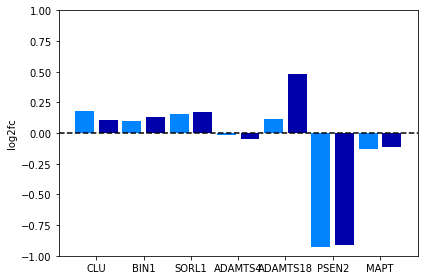

In [7]:
plt.xticks([0.5+val for val in range(0,len(geneNames)*2,2)],labels=geneNames)
plt.ylabel("log2fc")
plt.bar(range(len(geneNames)*2),oligenel2FCs, color=["#0085ffff" if i%2==0 else "#0000abff" for i in range(len(oligenel2FCs))])
plt.axhline(0, c='k', linestyle='dashed')
plt.ylim(-1,1)
plt.savefig("dlpfc_selected_genes_l2fcs.svg")

<BarContainer object of 14 artists>

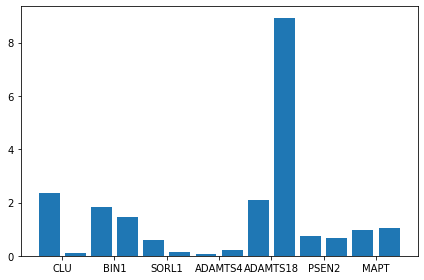

In [8]:
plt.xticks([0.5+val for val in range(0,len(geneNames)*2,2)],labels=geneNames)
plt.bar(range(len(geneNames)*2),oligeneIndModelFDRs)